Name: Md Abdul Kadir

Linear Model


In [2]:
#Imports
import pandas as pd
import numpy as np

In [3]:
# Importan Methodes
# Replace the nan vale with mean, median, or most frequent value
def replaceNaN(dataframe, replaceby = "mean"):
    if (replaceby == "mean"):
        return dataframe.fillna(dataframe.mean())
    
    elif (replaceby == "median"):
        return dataframe.fillna(dataframe.median())
    
    elif (replaceby == "mostfrq"):
        return dataframe.fillna(dataframe.mode().iloc[0])
    
    else:return dataframe.dropna()
    
# Replce any nonnumaric char from a column.    
def replce_char(dataframe,collumn, char=r'^<'):
    dataframe[collumn] =  dataframe[collumn].replace(regex=char, value='')
    dataframe[collumn] = pd.to_numeric(dataframe[collumn],errors='coerce')
    return dataframe
    
    
    
# Scale the data using standard scaler or max min scaler. Menstion the names to scale. 
def scale(dataframe, coulumns, scaler="ss"):
    if (scaler == "mm"):
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        dataframe[coulumns] = scaler.fit_transform(dataframe[coulumns])
        return dataframe
    elif (scaler == "ss"):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        datqframe[coulumns] = scaler.fit_transform(dataframe[coulumns])
        return dataframe
    
    else:return dataframe
        
    

    

In [4]:
#Load Dtasets

# Load Protein Supply Data

Protein_Supply_DF = pd.read_csv("../Data/Protein_Supply_Quantity_Data.csv")
Protein_Supply_DF = replaceNaN(Protein_Supply_DF, replaceby="mostfrq")



In [5]:
##Standard Scaler 
NOT_IPMORTANT_COLUMNS = ["Country", 'Unit (all except Population)', 'Population']

clm = Protein_Supply_DF.columns.drop(NOT_IPMORTANT_COLUMNS)

Protein_Supply_DF = replce_char(Protein_Supply_DF,"Undernourished", char=r'^<')
scaled_df = scale(Protein_Supply_DF, clm, scaler="mm")


In [30]:
# Randomise data
scaled_df = scaled_df.sample(frac=1,random_state=1).reset_index(drop=True)
scaled_df

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Greece,0.173939,0.718949,0.101764,0.000000,0.239089,0.348646,0.146262,0.204562,0.482208,...,0.440805,0.188666,0.581609,0.000000,0.036756,0.020087,0.020417,0.033908,10701000.0,%
1,Oman,0.021523,0.648885,0.029979,0.000000,0.306624,0.388807,0.250069,0.515565,0.409767,...,0.512992,0.123976,0.478161,0.075306,0.474853,0.019076,0.116882,0.715318,4695000.0,%
2,Tunisia,0.048097,0.312500,0.092689,0.000000,0.615425,0.309845,0.095408,0.167614,0.211699,...,0.754697,0.034119,0.579310,0.031524,0.012064,0.005016,0.013386,0.001207,11665000.0,%
3,Hungary,0.387189,0.761918,0.579892,0.000000,0.278409,0.669225,0.053863,0.078797,0.653231,...,0.342185,0.014441,0.609195,0.000000,0.053955,0.066736,0.037093,0.030447,9770000.0,%
4,Kenya,0.126208,0.261137,0.041909,0.000000,0.585388,0.076272,0.047007,0.123086,0.202445,...,0.178187,0.006925,0.089655,0.471103,0.006705,0.001908,0.002274,0.009236,52574000.0,%
5,Guinea-Bissau,0.140922,0.195028,0.034669,0.000000,0.815151,0.064886,0.019041,0.204235,0.278695,...,0.128734,0.181741,0.140230,0.446585,0.095947,0.007626,0.012948,0.160989,1879000.0,%
6,Morocco,0.014934,0.304351,0.026002,0.000000,0.784447,0.268070,0.176711,0.171514,0.269548,...,0.256445,0.017228,0.540230,0.015762,0.030286,0.006980,0.032905,0.004607,35587000.0,%
7,"Korea, North",0.021010,0.179608,0.000000,0.000000,0.571511,0.380792,0.160507,0.122585,0.198043,...,0.915200,0.024238,0.114943,0.793345,0.000000,0.000000,0.000000,0.000000,25666000.0,%
8,Slovenia,0.401757,0.735243,0.673600,0.000000,0.273379,0.415345,0.088086,0.160926,0.571526,...,0.309476,0.158770,0.468966,0.000000,0.093722,0.062339,0.103497,0.002047,2088000.0,%
9,Trinidad and Tobago,0.069180,0.654314,0.054247,0.000000,0.316646,0.198680,0.221670,0.090059,0.609285,...,0.168312,0.468879,0.404598,0.052539,0.011102,0.007014,0.012609,0.000185,1362000.0,%


# A simple regression model for 1 variable.

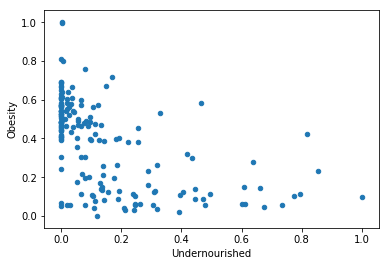

In [255]:
# Chosse training input and output
XY = scaled_df[['Undernourished','Obesity' ]]
XY.plot.scatter(x = 'Undernourished', y ='Obesity')

FEATURE_CLS = ['Obesity', 'Undernourished', 'Deaths','Recovered','Active','Confirmed']
FEATURE = ['Deaths']

In [256]:
# Devide trian and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(scaled_df, test_size=0.2, random_state=42)

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
X = pd.DataFrame(XY['Undernourished'])
y = pd.DataFrame(XY['Obesity'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
print(scores)

[0.42454177928231934, 0.19163766819268171, 0.20020314536544007]


In [283]:
from sklearn.linear_model import LinearRegression
def Regression(features, response, data, method = LinearRegression()):
    X = data[features]
    Y = data[response]
    return model.fit(X, Y)
    
    
    
def TestScore(features, response, data, model):
    print('Output: ', response)
    X = data[features]
    Y = data[response]
    return model.score(X,Y)
    
def PlotRegression(features, response, data, model):
    import matplotlib.pyplot as plt
    X = data[features]
    Y = data[response]
    y_pred = model.predict(X)
    plt.scatter(X, Y, s=10)
    plt.plot(X, y_pred, color='r')
    plt.show()
    

In [284]:
from sklearn import linear_model
model = Regression(FEATURE_OBESITY, ['Animal Products'], train_set, method = linear_model.Lasso(alpha=0.9) )


In [285]:
TestScore(FEATURE_OBESITY, ['Animal Products'],test_set, model)

Output:  ['Animal Products']


0.10841359202614731

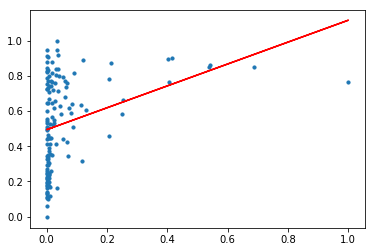

In [286]:
PlotRegression(FEATURE_OBESITY, ['Animal Products'] ,train_set, model)

In [288]:
ALL_OUTPUT = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Miscellaneous']

for cls in ALL_OUTPUT:
    model = Regression(FEATURE_CLS, cls, train_set, method = linear_model.Lasso(alpha=0.1) )
    print('R^2 : ', TestScore(FEATURE_CLS, cls,test_set, model))
    #PlotRegression(FEATURE, cls ,train_set, model)

Output:  Alcoholic Beverages
R^2 :  -0.11484470144978777
Output:  Animal Products
R^2 :  0.5435114265197778
Output:  Animal fats
R^2 :  -0.41668691747841335
Output:  Aquatic Products, Other
R^2 :  -9.851401853571817
Output:  Cereals - Excluding Beer
R^2 :  0.14980771865576548
Output:  Eggs
R^2 :  0.2198945353194045
Output:  Fish, Seafood
R^2 :  -0.12656896895223024
Output:  Fruits - Excluding Wine
R^2 :  -0.14374397048377352
Output:  Meat
R^2 :  0.16328933051903294
Output:  Milk - Excluding Butter
R^2 :  0.2791273672332314
Output:  Offals
R^2 :  -0.13198486144062072
Output:  Oilcrops
R^2 :  0.16352701605421327
Output:  Pulses
R^2 :  0.29535710775567814
Output:  Spices
R^2 :  0.12653319870889979
Output:  Starchy Roots
R^2 :  0.01634358977206951
Output:  Stimulants
R^2 :  -0.6491604684728896
Output:  Sugar Crops
R^2 :  -1.3984760379294738
Output:  Sugar & Sweeteners
R^2 :  -0.042586943903553776
Output:  Treenuts
R^2 :  0.27574138241779744
Output:  Vegetal Products
R^2 :  0.54341483058371

In [289]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator


def PolynomialReg(features, response, data, poly_model,base_model= linear_model.Lasso(alpha=0.1) ):  
    import matplotlib.pyplot as plt
    import operator
    X = data[features]
    Y = data[response]
    X_poly = poly_model.fit_transform(X)
    return base_model.fit(X_poly, Y)
    
    
    
def HigherOrderScore(features, response, data,poly_model, model):
    X = data[features]
    Y = data[response]
    X_poly = poly_model.fit_transform(X)
    Y_poly_pred = model.predict(X_poly)
    rmse = np.sqrt(mean_squared_error(Y,Y_poly_pred))
    r2 = r2_score(Y,Y_poly_pred)
    print(rmse)
    print(r2)
    plt.scatter(X, Y, s =10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X.values,Y_poly_pred), key=sort_axis)
    X, Y_poly_pred = zip(*sorted_zip)
    plt.plot(X, Y_poly_pred, color='m')
    plt.show()
    
def PolinomialAccuracy(features, response, data,poly_model, model):
    print('Output: ', response )
    X = data[features]
    Y = data[response]
    X_poly = poly_model.fit_transform(X)
    Y_poly_pred = model.predict(X_poly)
    rmse = np.sqrt(mean_squared_error(Y,Y_poly_pred))
    r2 = r2_score(Y,Y_poly_pred)
    print('rmse: ' ,rmse)
    print('R^2: ',r2)
    

In [291]:
polynomial_model= PolynomialFeatures(degree=2)
for cls in ALL_OUTPUT:
    model = PolynomialReg(FEATURE_CLS, cls, train_set, polynomial_model, base_model =linear_model.Lasso(alpha=0.1))
    PolinomialAccuracy(FEATURE_CLS, cls, test_set,  polynomial_model, model)

Output:  Alcoholic Beverages
rmse:  0.19279194280208722
R^2:  -0.013578577862466634
Output:  Animal Products
rmse:  0.23119283815835037
R^2:  -0.01972329738028833
Output:  Animal fats
rmse:  0.09491578501697392
R^2:  -0.035623283085566726
Output:  Aquatic Products, Other
rmse:  0.01029388626341262
R^2:  -1.995539333488138
Output:  Cereals - Excluding Beer
rmse:  0.20068017018174497
R^2:  -0.022510001288626347
Output:  Eggs
rmse:  0.20664885410725145
R^2:  -0.012750132179618179
Output:  Fish, Seafood
rmse:  0.180009806074045
R^2:  -0.02891040979230408
Output:  Fruits - Excluding Wine
rmse:  0.14478895843085182
R^2:  -0.013029377364487171
Output:  Meat
rmse:  0.19471115573048964
R^2:  -0.0010472746861611704
Output:  Milk - Excluding Butter
rmse:  0.2539916068544347
R^2:  -0.007843395086400529
Output:  Offals
rmse:  0.14482664704959908
R^2:  -0.029230849310938556
Output:  Oilcrops
rmse:  0.160068963648643
R^2:  -0.011396215974867507
Output:  Pulses
rmse:  0.1946602444240741
R^2:  -9.34949

In [ ]:
# Maximum r^2 is .54 i got 